In [11]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [12]:
driver = webdriver.Chrome()
driver.get("https://www.google.com")


In [13]:
search_box = driver.find_element(By.NAME, "q")
search_box.send_keys(""" "코로나" "루머" "백신" """)
search_box.send_keys(Keys.RETURN)

In [ ]:
driver.find_element(By.LINK_TEXT, '뉴스').click()
driver.implicitly_wait(2)
driver.find_element(By.ID, "hdtb-tls").click()
driver.implicitly_wait(2)
driver.find_element(By.ID, "ow16").click()
driver.implicitly_wait(2)
driver.find_element(By.XPATH, """//*[@id="lb"]/div/g-menu/g-menu-item[8]""").click()
print(driver.page_source)

In [ ]:
from datetime import datetime, timedelta
from selenium.common.exceptions import NoSuchElementException
import pandas as pd




article_count = {}
start_date = datetime(2020, 3, 1)
end_date = datetime(2020, 4, 8)

#뉴스 탭 클릭
driver.find_element(By.LINK_TEXT, '뉴스').click()
driver.implicitly_wait(5)

# 도구 버튼 상태 확인 및 클릭
tool_button = driver.find_element(By.ID, "hdtb-tls")
if tool_button.get_attribute("aria-expanded") == "false":
    tool_button.click()
driver.implicitly_wait(5)


while start_date <= end_date:
    end = start_date + timedelta(days=7)
    
    #최근 항목 드롭다운 클릭
    driver.find_element(By.XPATH, """//*[@id="tn_1"]/span[2]""").click()
    driver.implicitly_wait(5)

    #기간 설정 클릭
    driver.find_element(By.XPATH, """//*[@id="lb"]/div/g-menu/g-menu-item[8]""").click()
    driver.implicitly_wait(5)

    # 시작일 입력
    start_date_input = driver.find_element(By.ID, "OouJcb")
    start_date_input.clear()
    start_date_input.send_keys(start_date.strftime("%m/%d/%Y"))
    
    # 종료일 입력
    end_date_input = driver.find_element(By.ID, "rzG2be")
    end_date_input.clear()
    end_date_input.send_keys(end.strftime("%m/%d/%Y"))
    
    # 실행 버튼 클릭
    execute_button = driver.find_element(By.XPATH, "//g-button[contains(@class, 'Ru1Ao BwGU8e fE5Rge')]")
    execute_button.click()
    
    # 다음 주기로 이동
    start_date += timedelta(days=7)
    
    # 페이지 로딩을 위한 대기 시간
    driver.implicitly_wait(5)
    
    # 검색 결과 처리
    try:
        result_stats = driver.find_element(By.ID, "result-stats").text
    except :
        result_stats = "0"

    article_count.setdefault(start_date, result_stats)
    print(result_stats)


print("검색 완료")

In [16]:
from datetime import datetime, timedelta
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
import pandas as pd
import re
import time



# 뉴스 탭 및 도구 버튼은 루프 밖에서 한 번만 클릭
driver.find_element(By.LINK_TEXT, '뉴스').click()
driver.implicitly_wait(5)

# 도구 버튼 상태 확인 및 클릭
tool_button = driver.find_element(By.ID, "hdtb-tls")
if tool_button.get_attribute("aria-expanded") == "false":
    tool_button.click()
driver.implicitly_wait(5)

data_to_process = data[data['백신 가짜뉴스'].isna()].reset_index()

#for idx, date in data['접종일'].items():
for idx, date in  data_to_process.iterrows():
    date_str = date.strftime("%m/%d/%Y")

    # 최근 항목 드롭다운 클릭
    driver.find_element(By.XPATH, """//*[@id="tn_1"]/span[2]""").click()
    driver.implicitly_wait(5)

    # 기간 설정 클릭
    driver.find_element(By.XPATH, """//*[@id="lb"]/div/g-menu/g-menu-item[8]""").click()
    driver.implicitly_wait(5)

    # 시작일 입력
    start_date_input = driver.find_element(By.ID, "OouJcb")
    start_date_input.clear()
    start_date_input.send_keys(date_str)
    
    # 종료일 입력
    end_date_input = driver.find_element(By.ID, "rzG2be")
    end_date_input.clear()
    end_date_input.send_keys(date_str)
    
    # 실행 버튼 클릭
    execute_button = driver.find_element(By.XPATH, "//g-button[contains(@class, 'Ru1Ao BwGU8e fE5Rge')]")
    execute_button.click()
    
    # 페이지 로딩을 위한 대기 시간
    driver.implicitly_wait(5)
    time.sleep(1)

    # 검색 결과 처리
    try:
        result_text = driver.find_element(By.ID, "result-stats").text
        # 숫자만 추출
        result_number = re.search(r'[\d,]+', result_text).group()
        # 쉼표 제거 및 정수로 변환
        result_number = int(result_number.replace(',', ''))
    except (NoSuchElementException, AttributeError):
        result_number = 0

    # 데이터프레임의 해당 행에 기사 수 추가
    data.at[idx, "백신 가짜뉴스"] = result_number
    print(f"{date_str}: {result_number}")


print("검색 완료")

04/21/2021: 2
04/22/2021: 3
04/23/2021: 1
04/24/2021: 1
04/25/2021: 0
04/26/2021: 0
04/27/2021: 0
04/28/2021: 4
04/29/2021: 0
04/30/2021: 7
05/01/2021: 0
05/02/2021: 0
05/03/2021: 4
05/04/2021: 0
05/05/2021: 1
05/06/2021: 1
05/07/2021: 2
05/08/2021: 1
05/09/2021: 1
05/10/2021: 2
05/11/2021: 1
05/12/2021: 1
05/13/2021: 3
05/14/2021: 2
05/15/2021: 2
05/16/2021: 0
05/17/2021: 2
05/18/2021: 3
05/19/2021: 2
05/20/2021: 4
05/21/2021: 3
05/22/2021: 0
05/23/2021: 3
05/24/2021: 2
05/25/2021: 3
05/26/2021: 5
05/27/2021: 3
05/28/2021: 2
05/29/2021: 0
05/30/2021: 1
05/31/2021: 4
06/01/2021: 4
06/02/2021: 3
06/03/2021: 6
06/04/2021: 3
06/05/2021: 2
06/06/2021: 2
06/07/2021: 3
06/08/2021: 3
06/09/2021: 3
06/10/2021: 4
06/11/2021: 2
06/12/2021: 0
06/13/2021: 2
06/14/2021: 2
06/15/2021: 4
06/16/2021: 0
06/17/2021: 2
06/18/2021: 0
06/19/2021: 2
06/20/2021: 1
06/21/2021: 0
06/22/2021: 2
06/23/2021: 0
06/24/2021: 1
06/25/2021: 0
06/26/2021: 0
06/27/2021: 3
06/28/2021: 0
06/29/2021: 3
06/30/2021: 2
07/01/

In [8]:
import pandas as pd

df = pd.read_csv('data/vaccine_data.csv', encoding='utf-8')

columns_to_use = ['접종일', '당일 1차접종자 수', '당일 2차접종자 수', '동절기접종 누계']
data = df[columns_to_use]

# 날짜 형식 변환 및 정렬
data['접종일'] = pd.to_datetime(data['접종일'], errors='coerce')
data = data.dropna(subset=['접종일'])
data = data.sort_values('접종일')


C:\Users\mizan\AppData\Local\Temp\ipykernel_2224\2614233554.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['접종일'] = pd.to_datetime(data['접종일'], errors='coerce')
C:\Users\mizan\AppData\Local\Temp\ipykernel_2224\2614233554.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['접종일'] = pd.to_datetime(data['접종일'], errors='coerce')


In [9]:
data.head()

,접종일,당일 1차접종자 수,당일 2차접종자 수,동절기접종 누계
676,2021-04-21,20830,25,NaN
675,2021-04-22,22831,2358,NaN
674,2021-04-23,28378,2475,NaN
673,2021-04-24,4663,137,NaN
672,2021-04-25,204,0,NaN


In [17]:
data.to_csv('updated_vaccine_data.csv', index=False, encoding='utf-8')

c:\Users\mizan\Github\dataset\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mizan\Github\dataset\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mizan\Github\dataset\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mizan\Github\dataset\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mizan\Github\dataset\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45684 (\N{HANGUL SYLLABLE NYU}) missing fro

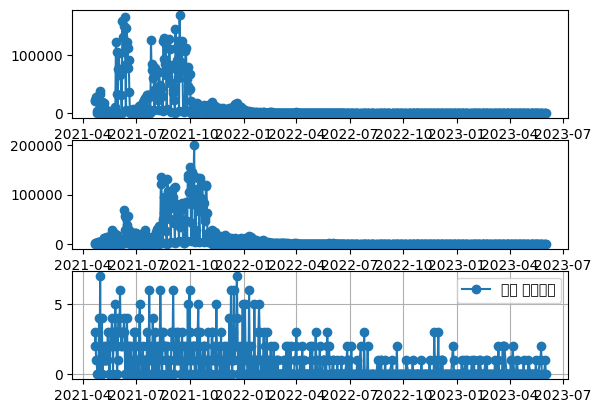

In [22]:
import matplotlib.pyplot as plt

plt.subplot(3,1,1)

plt.plot(data['접종일'], data['당일 1차접종자 수'], marker='o', label='1차접종자')

plt.subplot(3,1,2)
plt.plot(data['접종일'], data['당일 2차접종자 수'], marker='o', label='2차접종자')

plt.subplot(3,1,3)
plt.plot(data['접종일'], data['백신 가짜뉴스'], marker='o', label='백신 가짜뉴스')


plt.show()

plt.show()



C:\Users\mizan\AppData\Local\Temp\ipykernel_2224\2180290783.py:37: UserWarning: Glyph 51217 (\N{HANGUL SYLLABLE JEOB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mizan\AppData\Local\Temp\ipykernel_2224\2180290783.py:37: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mizan\AppData\Local\Temp\ipykernel_2224\2180290783.py:37: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mizan\AppData\Local\Temp\ipykernel_2224\2180290783.py:37: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mizan\AppData\Local\Temp\ipykernel_2224\2180290783.py:37: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\mizan\AppData\Local\Temp\ipykernel_2224\2180290783.py:37: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(

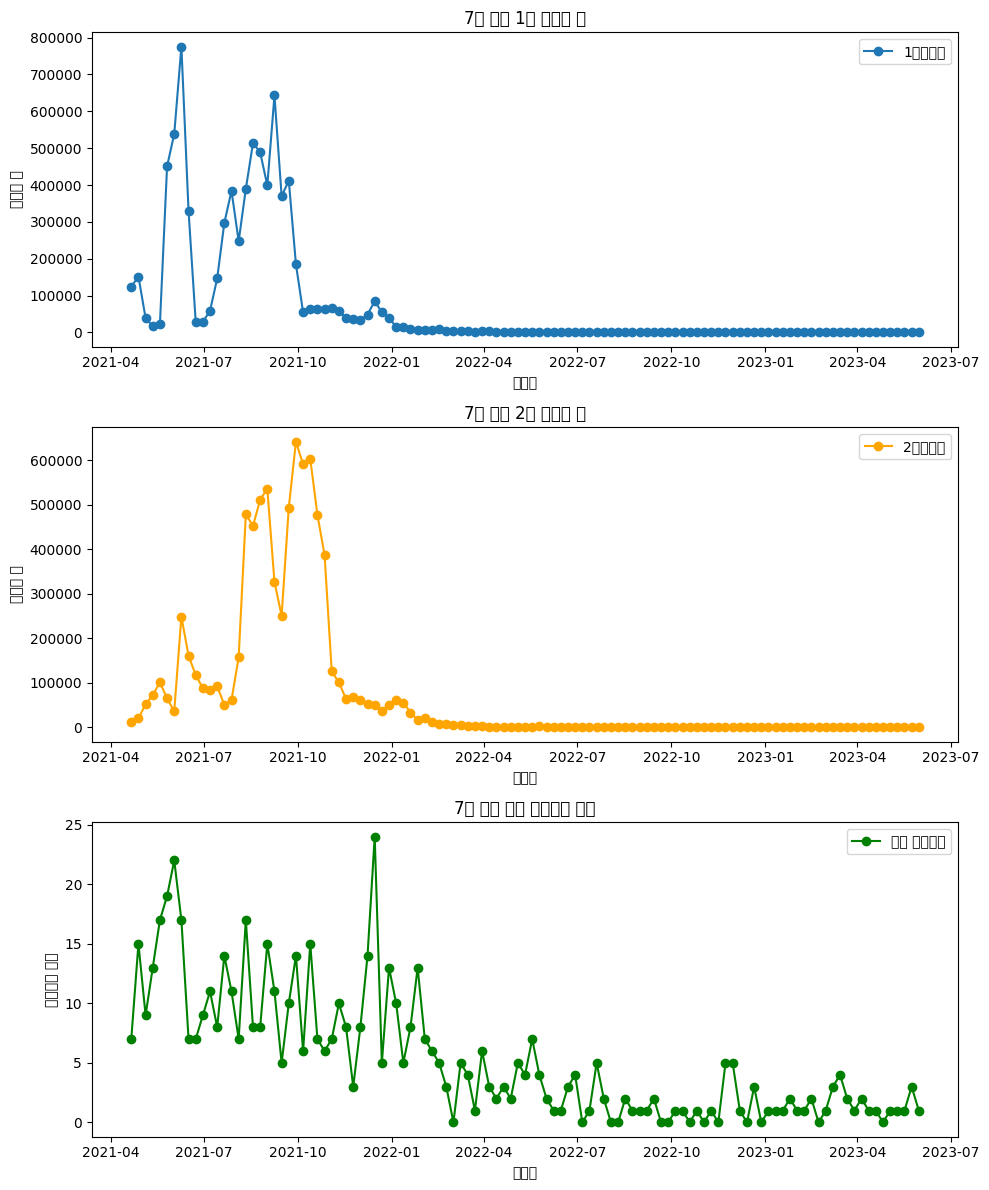

In [23]:
# '접종일'을 datetime 형식으로 변환
data['접종일'] = pd.to_datetime(data['접종일'])


# '접종일'을 인덱스로 설정
data.set_index('접종일', inplace=True)

# 7일 단위로 데이터를 묶고 합계를 계산
grouped_data = data.resample('7D').sum()


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))

plt.subplot(3,1,1)
plt.plot(grouped_data.index, grouped_data['당일 1차접종자 수'], marker='o', label='1차접종자')
plt.title('7일 단위 1차 접종자 수')
plt.xlabel('접종일')
plt.ylabel('접종자 수')
plt.legend()

plt.subplot(3,1,2)
plt.plot(grouped_data.index, grouped_data['당일 2차접종자 수'], marker='o', label='2차접종자', color='orange')
plt.title('7일 단위 2차 접종자 수')
plt.xlabel('접종일')
plt.ylabel('접종자 수')
plt.legend()

plt.subplot(3,1,3)
plt.plot(grouped_data.index, grouped_data['백신 가짜뉴스'], marker='o', label='백신 가짜뉴스', color='green')
plt.title('7일 단위 백신 가짜뉴스 건수')
plt.xlabel('접종일')
plt.ylabel('가짜뉴스 건수')
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
grouped_data.to_csv('data/grouped_vaccine.csv', index=True, encoding='utf-8')